# In Class Notebook, Week 02

To access this in near-real time try: https://github.com/UIUC-iSchool-DataViz/is445_oauoag_spring2023/blob/master/week02/inClass_week02.ipynb

Or paste this URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

I am writing something here.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# can run with the RUN button OR SHIFT+RETURN

I am leaving myself notes.

# This is a big header
## This is a smaller header
### Medium header
#### Tiny header

I can make bulleted lists:
* thing 1
* thing 2
* thing 3

I can also make ordered lists:
1. first thing
1. second thing
1. third thing

I can **bold** things.

I can *italicize* things as well.

$\frac{x}{y} = 2$

In [4]:
import PIL.Image as Image

In [5]:
im = Image.open('/Users/jnaiman/Downloads/stitch_reworked.png') # Mac machine
# Windows: C://Downloads

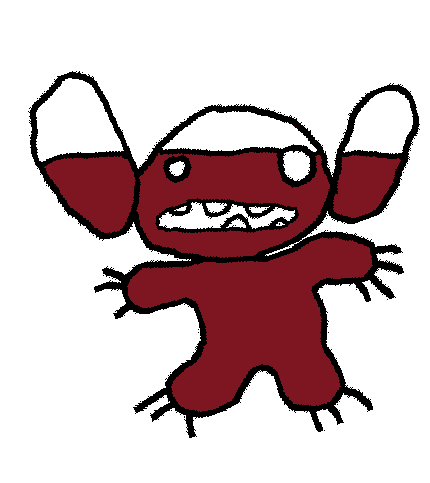

In [6]:
im

In [7]:
type(im)

PIL.PngImagePlugin.PngImageFile

In [8]:
im_data = np.array(im)

In [10]:
im_data.shape # 4 color channels: R=Red, G=Green, B=Blue, A=Alpha (opacity/seethrough-ness)

(483, 430, 4)

In [11]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [12]:
im_data.reshape(-1, im_data.shape[2])

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [13]:
np.unique(im_data.reshape(-1,im_data.shape[2]),axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

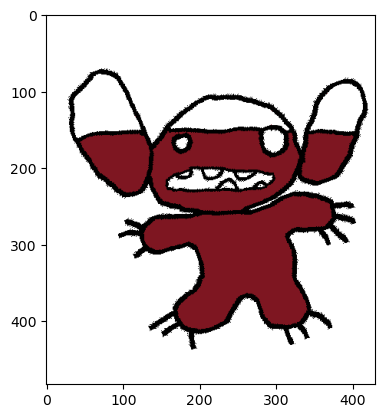

In [15]:
plt.imshow(im_data)
plt.show()

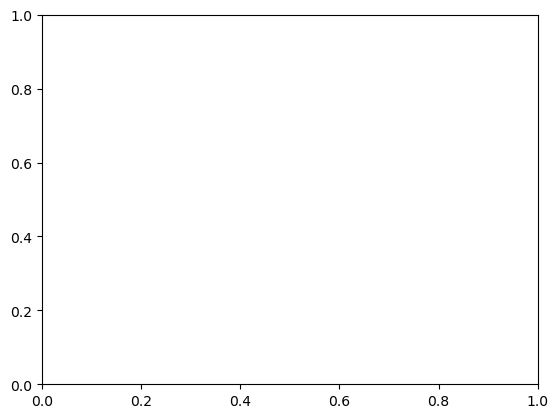

In [16]:
fig, ax = plt.subplots()

In [17]:
ax

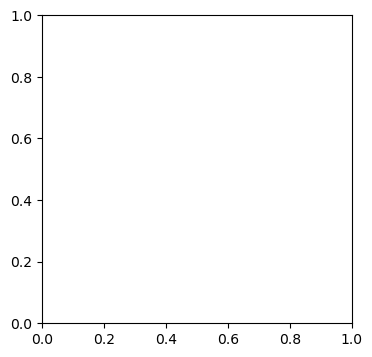

In [19]:
fig, ax = plt.subplots(figsize=(4,4))

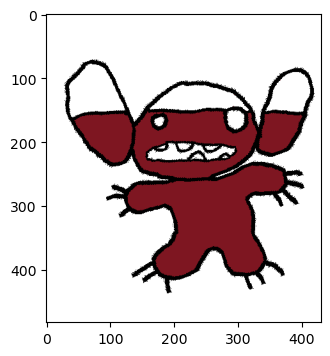

In [20]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(im_data)
plt.show()

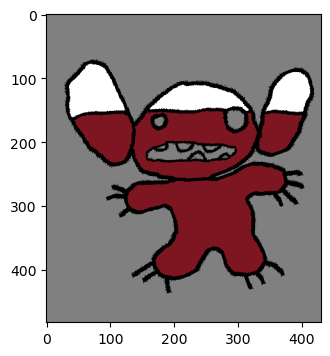

In [23]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_facecolor('gray')
ax.imshow(im_data)
plt.show()

In [24]:
reds_good_mask = im_data[:,:,0] == 255
#                [:=all y pixels, := all x pixels, 0th=R, red channel]
#.               == 255 means ONLY take the "good" pixels

In [25]:
reds_good_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [26]:
im_data[reds_good_mask]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

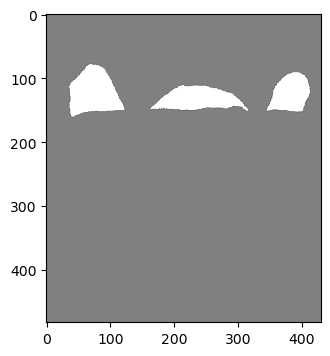

In [29]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_facecolor('gray')
im_data_good = im_data.copy()
im_data_good[~reds_good_mask] = 0
#ax.imshow(im_data[reds_good_mask]) # error!
ax.imshow(im_data_good)
plt.show()

In [32]:
len(im_data[reds_good_mask])

11929

In [33]:
reds_bad_mask = im_data[:,:,0] == 126

In [34]:
len(im_data[reds_bad_mask])

40949

## Now visualizations of the color distribution

In [35]:
im_data.shape

(483, 430, 4)

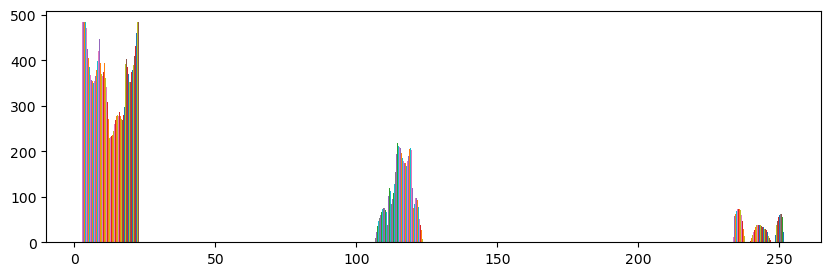

In [37]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0]) # all y, all x, 0 = red channel
plt.show()

In [38]:
im_data[:,:,0].shape

(483, 430)

In [39]:
im_data[:,:,0].flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

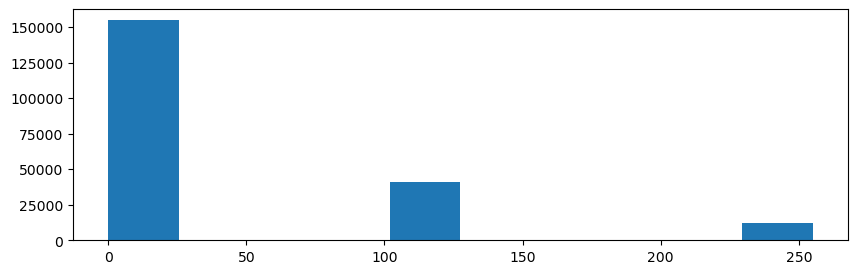

In [40]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten()) # all y, all x, 0 = red channel
plt.show()

In [41]:
ax.hist?

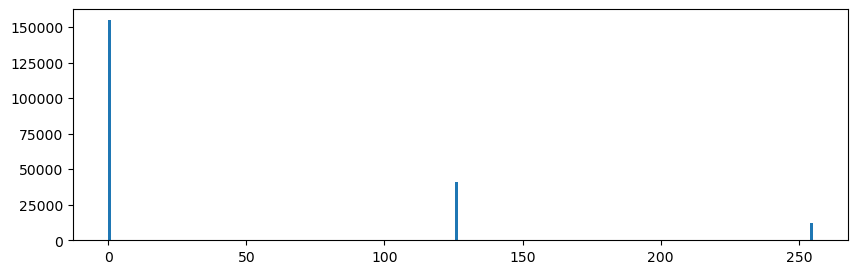

In [42]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(), bins=256) # all y, all x, 0 = red channel
plt.show()

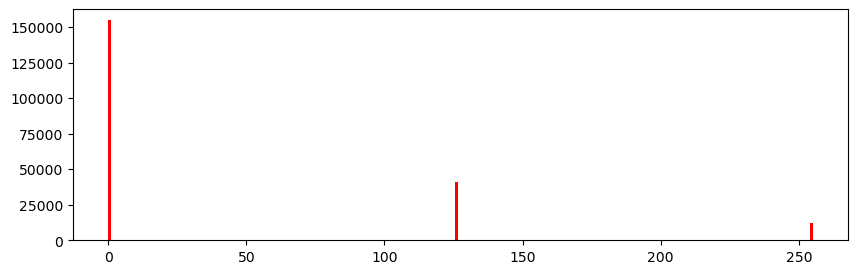

In [43]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(), bins=256, color='red') # all y, all x, 0 = red channel
plt.show()

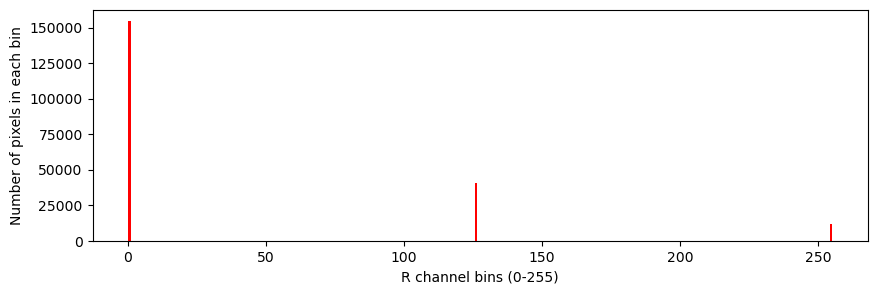

In [44]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(), bins=256, color='red') # all y, all x, 0 = red channel
ax.set_xlabel('R channel bins (0-255)')
ax.set_ylabel('Number of pixels in each bin')
plt.show()

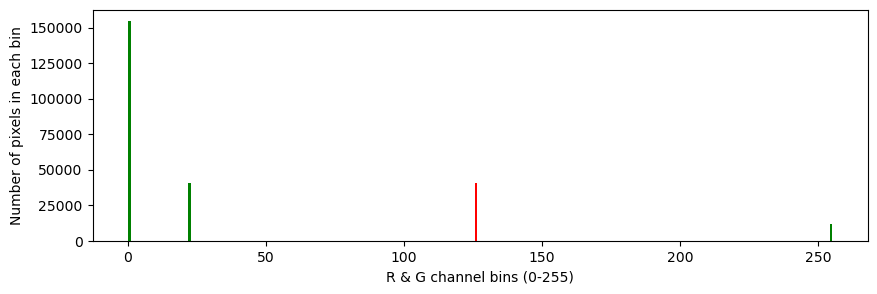

In [45]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(), bins=256, color='red') # all y, all x, 0 = red channel
ax.hist(im_data[:,:,1].flatten(), bins=256, color='green') # 1 = green channel
ax.set_xlabel('R & G channel bins (0-255)')
ax.set_ylabel('Number of pixels in each bin')
plt.show()

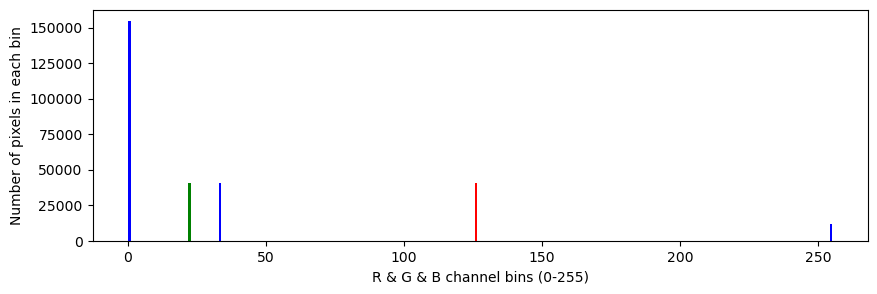

In [46]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(), bins=256, color='red') # all y, all x, 0 = red channel
ax.hist(im_data[:,:,1].flatten(), bins=256, color='green') # 1 = green channel
ax.hist(im_data[:,:,2].flatten(), bins=256, color='blue') # 2 = blue channel
ax.set_xlabel('R & G & B channel bins (0-255)')
ax.set_ylabel('Number of pixels in each bin')
plt.show()

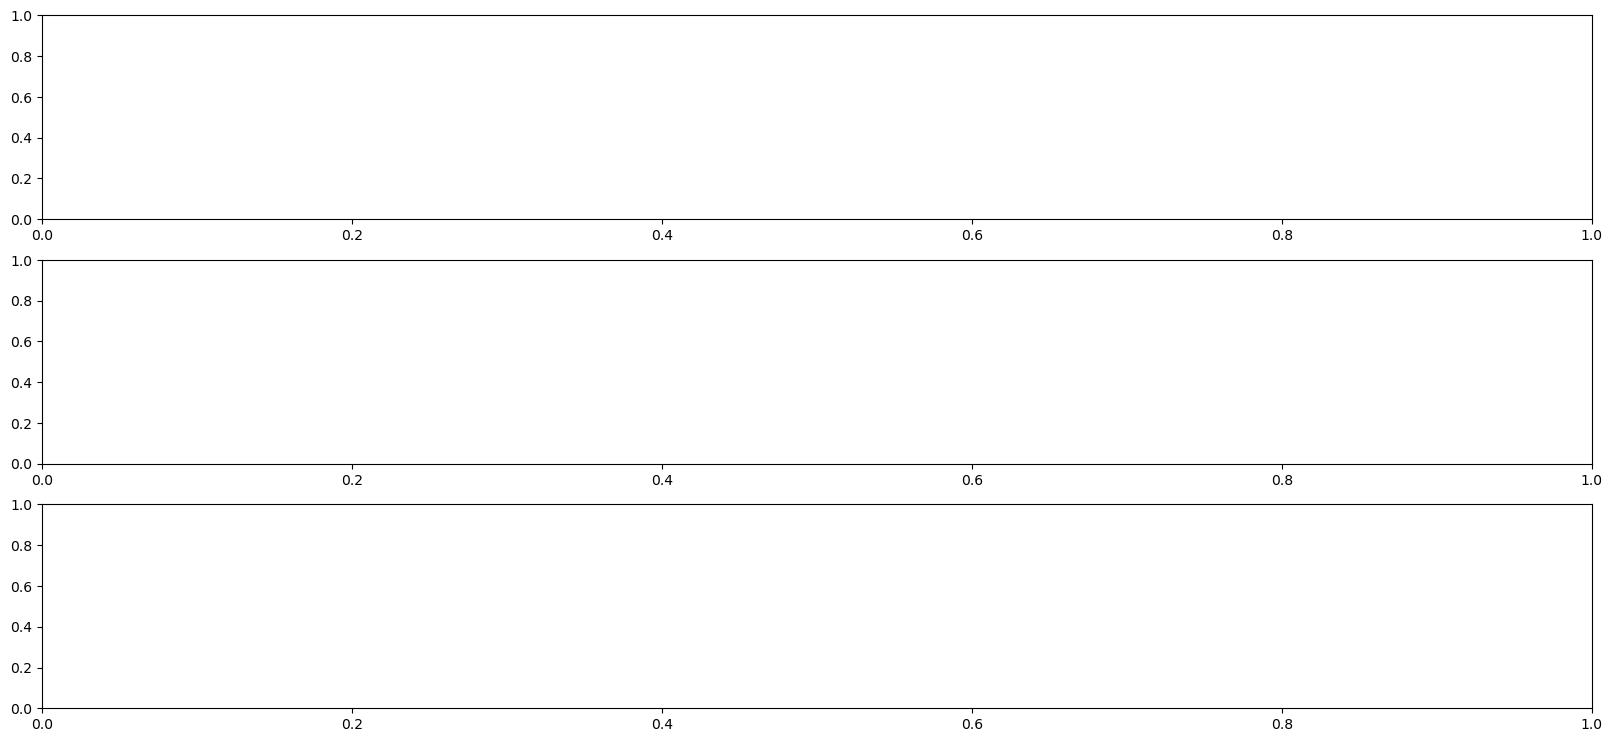

In [47]:
fig, ax = plt.subplots(3,1, figsize=(20,9)) # 3= # rows, 1 = # columns